# Analyzing-online-Job-Postings-shashvindu jha
jhashashvindu@yahoo.com

# Business Context:
The project seeks to understand the overall demand for labour in the Armenian online job market from the 19,000 job postings from 2004 to 2015 posted on CareerCenter, an Armenian human resource portal. Through text mining on this data, we will be able to understand the nature of the ever-changing job market, as well as the overall demand for labour in the Armenia economy. The data was originally scraped from a Yahoo! Mailing group.

# Business Objectives:
to understand the dynamics of the labour market of Armenia using the online job portal post as a proxy. (main)

to implement advanced text analytics as a proof of concept to create additional features such as enhanced search function that can add additional value to the users of the job portal.(secondary)

to find the answer of mainly two questions for each features of the dataset(i.e. job profile, company, required qualification etc)-- What are the types of that feature that are in demand in Armenia? and how its nature changing over time?

to build a classifier that can tell us from the job description and company description whether a job is IT or not, so that this column can be automatically populated for new job postings.

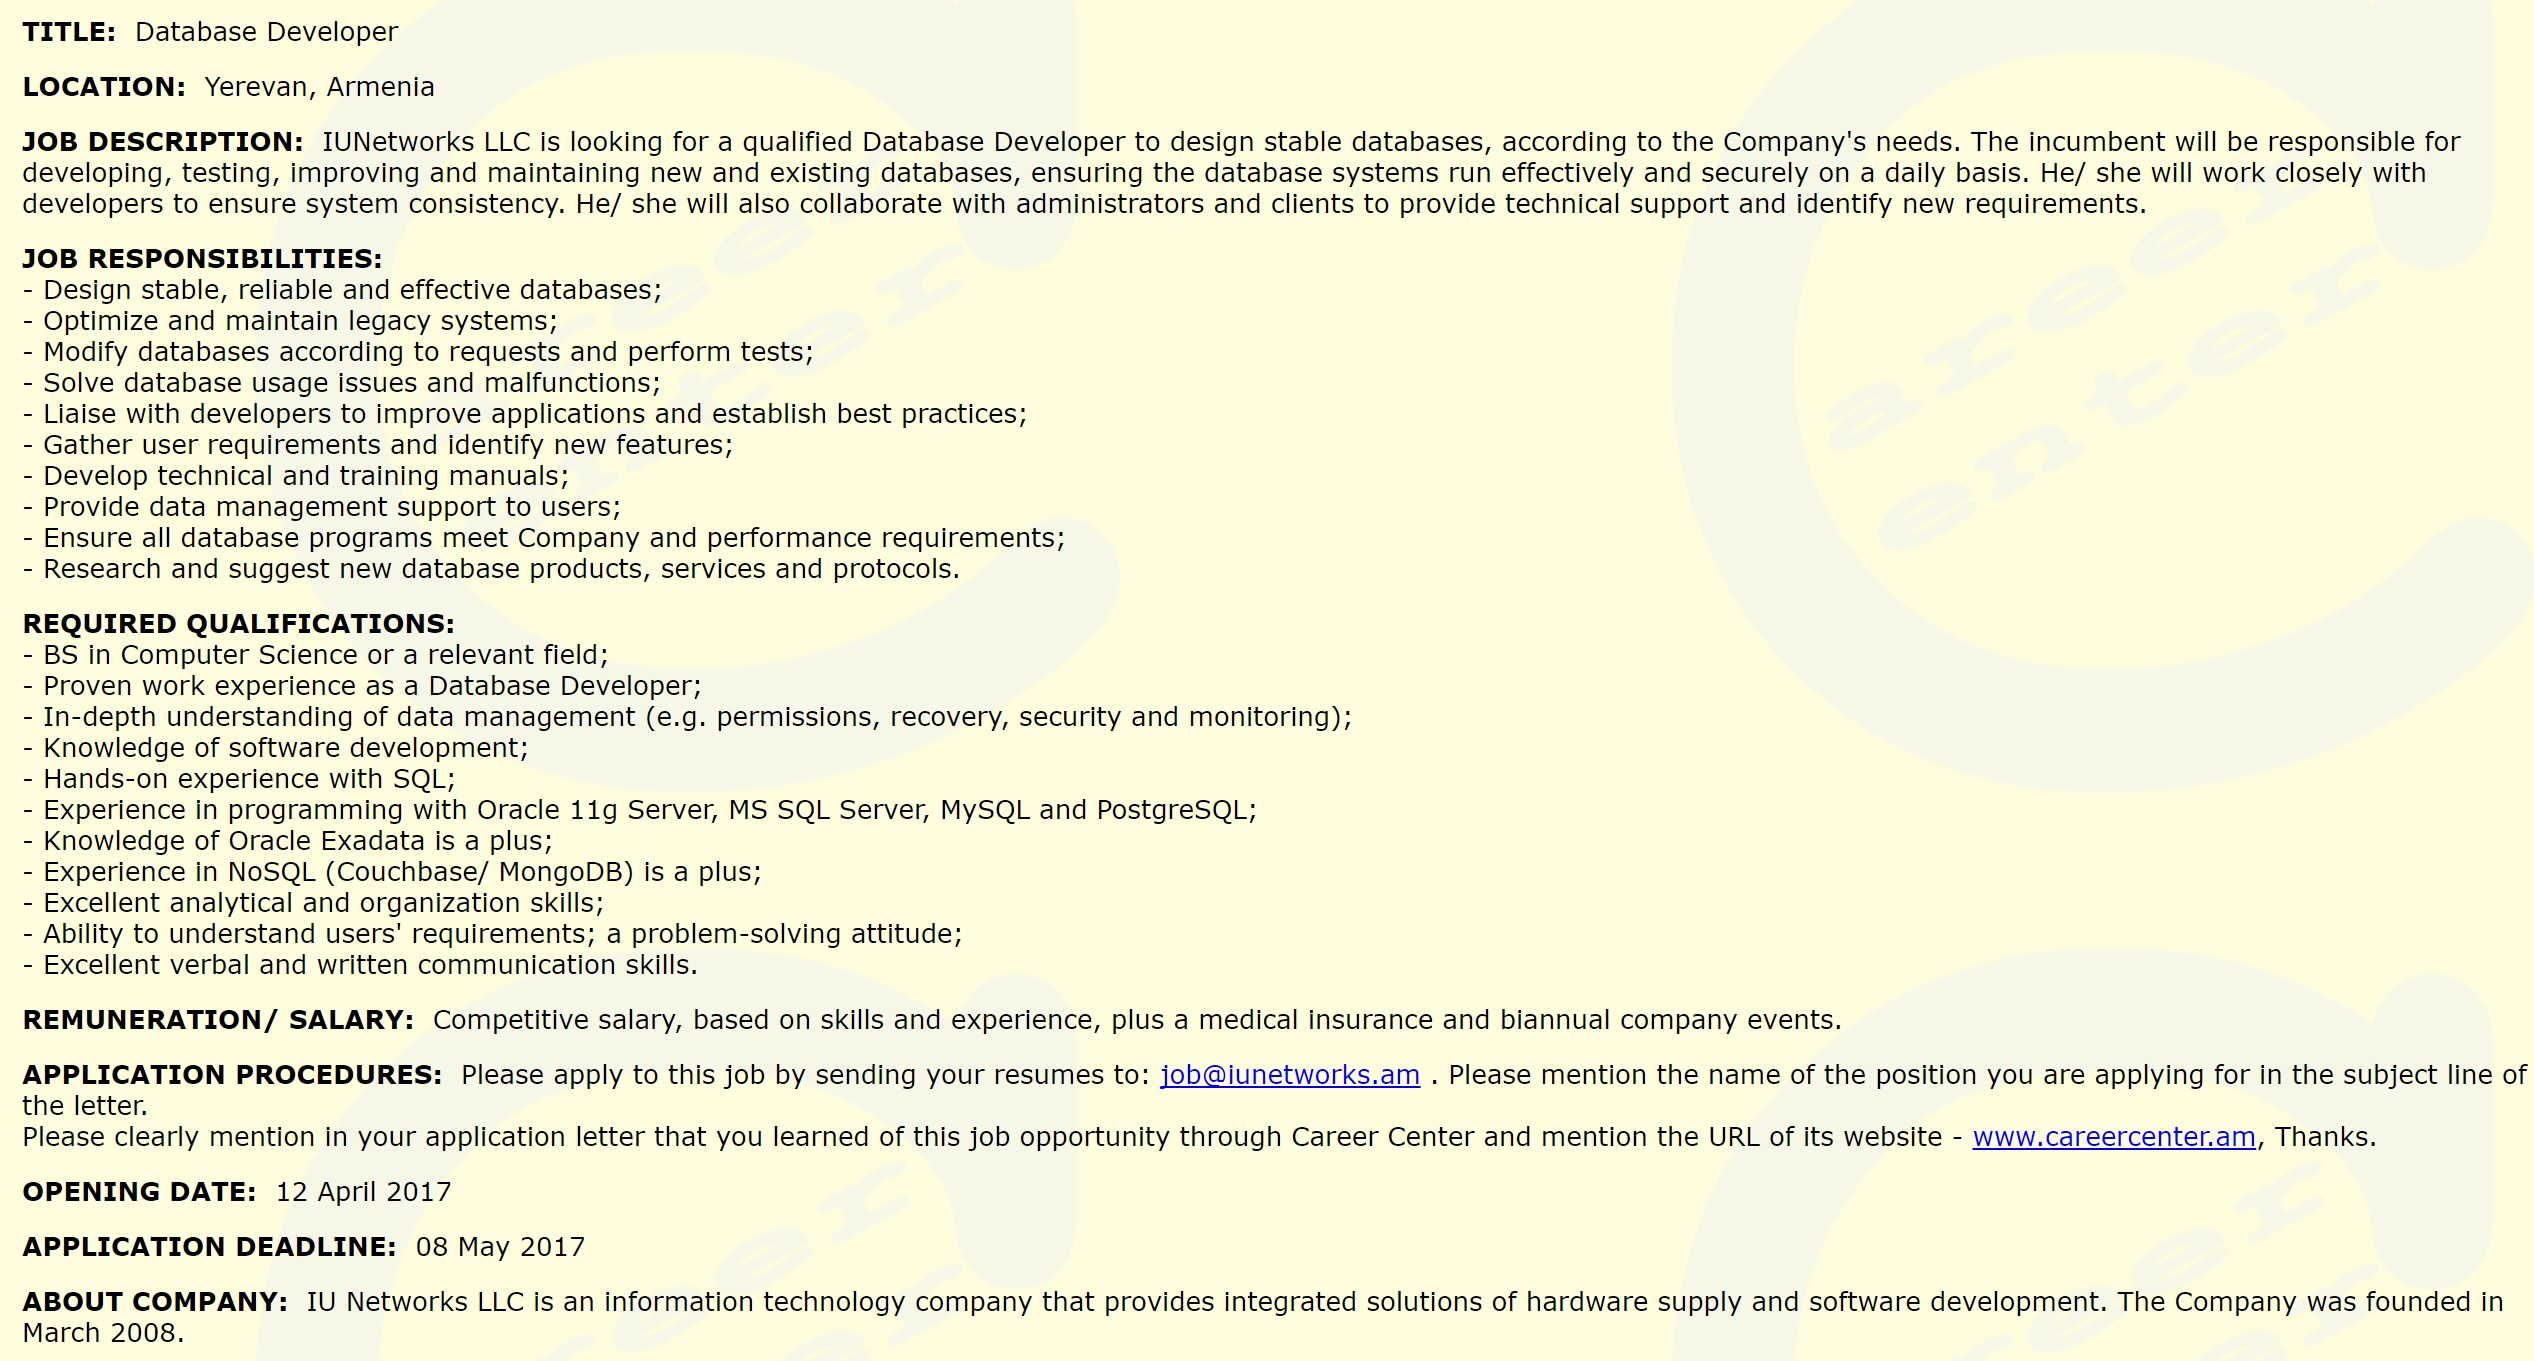

In [1]:
from IPython.display import Image
Image("screenshot.jpg", width=1000, height=1000)

# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,TweetTokenizer # Tweet tokenizer does not split at apostophes which is what we want
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 

In [4]:
## import warning
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [5]:
data=pd.read_csv("data job posts.csv")
data.shape

(19001, 24)

In [6]:
data.head().T

,0,1,2,3,4
jobpost,AMERIA Investment Consulting Company\nJOB TITL...,International Research & Exchanges Board (IREX...,Caucasus Environmental NGO Network (CENN)\nJOB...,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,Yerevan Brandy Company\nJOB TITLE: Software D...
date,"Jan 5, 2004","Jan 7, 2004","Jan 7, 2004","Jan 7, 2004","Jan 10, 2004"
Title,Chief Financial Officer,Full-time Community Connections Intern (paid i...,Country Coordinator,BCC Specialist,Software Developer
Company,AMERIA Investment Consulting Company,International Research & Exchanges Board (IREX),Caucasus Environmental NGO Network (CENN),Manoff Group,Yerevan Brandy Company
AnnouncementCode,NaN,NaN,NaN,NaN,NaN
Term,NaN,NaN,NaN,NaN,NaN
Eligibility,NaN,NaN,NaN,NaN,NaN
Audience,NaN,NaN,NaN,NaN,NaN
StartDate,NaN,NaN,NaN,NaN,NaN
Duration,NaN,3 months,Renewable annual contract\nPOSITION,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

# Data Preparation

## Dropping duplicate rows from the dataset

In [8]:
data.shape

(19001, 24)

In [9]:
data= data.drop_duplicates()
data.shape

(18962, 24)

# StartDate column

NOTE:
In the StartDate column, the records that contains "As soon as possible", "Immediately", "Immediate","Immediate employment","Imminent" etc-- all are repalced with "ASAP" for convenience

In [10]:
asap_list=[]

for ele in data.StartDate.dropna().unique(): 
    s=ele.lower()
    if ((s.find("asap")!=-1)|(s.find("immediate")!=-1)|(s.find("immadiate")!=-1)|(s.find("as soon as possible")!=-1)):asap_list.append(ele)

asap_list.sort() 
for x in asap_list: print(x)

01 April 2014 or ASAP
01 September 2014 or ASAP
12 November 2012 or ASAP
15 April 2013 or ASAP
20 November 2014 or ASAP
ASAP
ASAP preferred
ASAP starting 10 February 2006
ASAP with 3 months probation period.
Applicants must be able to start no later than July
19, 2004. Position to be filled as soon as possible; will remain open
until filled
April 2014 or ASAP
As soon as Possible
As soon as possible
As soon as possible.
Asap
Immadiate
Immediate
Immediate employment
Immediate employment after passing the interview
Immediate employment opportunity
Immediate employment opportunity.
Immediate employment, after passing the interview.
Immediate employment.
Immediate hire
Immediate hiring
Immediate job opening
Immediate job opportunity
Immediate or earliest possible
Immediatelly
Immediately
Immediately or as per agreement
Immediately upon agreement
Immediately upon selection or no later than November
15, 2009.
Immediately upon selection, latest July 1, 2007
Immediately with 2 months probation 

In [11]:
data.StartDate.dropna().nunique()

1186

In [12]:
data.loc[data['StartDate'].isin(asap_list),'StartDate']='ASAP'

#for x in data.StartDate.dropna().unique(): print(x)
data.StartDate.dropna().nunique()

1146

# Creating a new dataset with selected features

In [13]:
data.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [14]:
selected_feat=['jobpost', 'Title', 'Company','Location','JobDescription', 'JobRequirment', 'RequiredQual','IT','Year', 'Month']
df=data[selected_feat]
df.head(3)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,IT,Year,Month
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",False,2004,1
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),"IREX Armenia Main Office; Yerevan, Armenia \nD...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,False,2004,1
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,Caucasus Environmental NGO Network (CENN),"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",False,2004,1


In [15]:
text_feat=['jobpost', 'Title', 'Company','Location','JobDescription', 'JobRequirment', 'RequiredQual']

In [16]:
df[text_feat].describe().T

,count,unique,top,freq
jobpost,18962,18892,Career Center NGO\nTITLE: English Language Co...,9
Title,18934,8636,Accountant,328
Company,18955,4554,ArmenTel CJSC,353
Location,18930,759,"Yerevan, Armenia",17028
JobDescription,15076,12861,The incumbent will work under the direct super...,54
JobRequirment,16449,14182,- Participate in application design;\n- Provid...,50
RequiredQual,18481,16688,- Excellent communication skills;\n- Good oral...,42


In [17]:
# List of columns of df that dont belong to text features
[x for x in df.columns if x not in text_feat]

['IT', 'Year', 'Month']

# Missing value treatment

In [18]:
df.isnull().sum()

jobpost              0
Title               28
Company              7
Location            32
JobDescription    3886
JobRequirment     2513
RequiredQual       481
IT                   0
Year                 0
Month                0
dtype: int64

In [19]:
df.isnull().sum().where(lambda x:  x>len(data)*0.25).dropna()

Series([], dtype: float64)

In [20]:
#Missing values are imputated with corresponding mode
for col in ['Title', 'Company', 'Location','JobRequirment', 'JobDescription','RequiredQual']:
    df[col]=df[col].fillna(df[col].mode()[0])

df.isnull().sum()

jobpost           0
Title             0
Company           0
Location          0
JobDescription    0
JobRequirment     0
RequiredQual      0
IT                0
Year              0
Month             0
dtype: int64

# Data Preprocessing for Text mining

In [21]:
text_feat

['jobpost',
 'Title',
 'Company',
 'Location',
 'JobDescription',
 'JobRequirment',
 'RequiredQual']

# Converting text features into lowercase

In [22]:
for col in text_feat:
    df[col] = df[col].apply(lambda x: x.lower())

df[text_feat].head(3)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual
0,ameria investment consulting company\njob titl...,chief financial officer,ameria investment consulting company,"yerevan, armenia",ameria investment consulting company is seekin...,- supervises financial management and administ...,"to perform this job successfully, an\nindividu..."
1,international research & exchanges board (irex...,full-time community connections intern (paid i...,international research & exchanges board (irex),"irex armenia main office; yerevan, armenia \nd...",the incumbent will work under the direct super...,- participate in application design;\n- provid...,- bachelor's degree; master's is preferred;\n-...
2,caucasus environmental ngo network (cenn)\njob...,country coordinator,caucasus environmental ngo network (cenn),"yerevan, armenia",public outreach and strengthening of a growing...,- working with the country director to provide...,"- degree in environmentally related field, or ..."


# Removing Numbers from text
Inflect library correctly generate plurals, ordinals, indefinite articles; convert numbers to words

In [24]:
# import the inflect library 
import inflect
inf= inflect.engine()

inf.number_to_words(1234)  #check

'one thousand, two hundred and thirty-four'

In [25]:
def convert_number(text):         
    temp_str = text.split() # split string into list of words  
    new_string = [] # initialise empty list
    
    for word in temp_str:
        # if word is a digit, convert the digit to numbers and append into the new_string list
        if word.isdigit():
            temp = inf.number_to_words(word) 
            new_string.append(temp)      
        else: 
            new_string.append(word) 
            
    temp_str = ' '.join(new_string)# join the words of new_string to form a string 
    return temp_str 

convert_number("my number is 123")  #check

'my number is one hundred and twenty-three'

In [26]:
for col in text_feat:   
    df[col] = df[col].apply(lambda x: convert_number(x))

df[text_feat].head(3)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual
0,ameria investment consulting company job title...,chief financial officer,ameria investment consulting company,"yerevan, armenia",ameria investment consulting company is seekin...,- supervises financial management and administ...,"to perform this job successfully, an individua..."
1,international research & exchanges board (irex...,full-time community connections intern (paid i...,international research & exchanges board (irex),"irex armenia main office; yerevan, armenia des...",the incumbent will work under the direct super...,- participate in application design; - provide...,- bachelor's degree; master's is preferred; - ...
2,caucasus environmental ngo network (cenn) job ...,country coordinator,caucasus environmental ngo network (cenn),"yerevan, armenia",public outreach and strengthening of a growing...,- working with the country director to provide...,"- degree in environmentally related field, or ..."


# Removing Punctuation

In [27]:
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [28]:
for col in text_feat:    
    df[col] = df[col].apply(lambda x: remove_punctuation(x))

df[text_feat].head(3)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual
0,ameria investment consulting company job title...,chief financial officer,ameria investment consulting company,yerevan armenia,ameria investment consulting company is seekin...,supervises financial management and administr...,to perform this job successfully an individual...
1,international research exchanges board irex t...,fulltime community connections intern paid int...,international research exchanges board irex,irex armenia main office yerevan armenia descr...,the incumbent will work under the direct super...,participate in application design provide ne...,bachelors degree masters is preferred excell...
2,caucasus environmental ngo network cenn job ti...,country coordinator,caucasus environmental ngo network cenn,yerevan armenia,public outreach and strengthening of a growing...,working with the country director to provide ...,degree in environmentally related field or fi...


# Removing Whitespaces
--Using the join and split function to remove all the white spaces in a string.

In [29]:
def remove_whitespace(text): 
    return  " ".join(text.split())

In [30]:
for col in text_feat:   
    df[col] = df[col].apply(lambda x: remove_whitespace(x))

df[text_feat].head(3)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual
0,ameria investment consulting company job title...,chief financial officer,ameria investment consulting company,yerevan armenia,ameria investment consulting company is seekin...,supervises financial management and administra...,to perform this job successfully an individual...
1,international research exchanges board irex ti...,fulltime community connections intern paid int...,international research exchanges board irex,irex armenia main office yerevan armenia descr...,the incumbent will work under the direct super...,participate in application design provide nece...,bachelors degree masters is preferred excellen...
2,caucasus environmental ngo network cenn job ti...,country coordinator,caucasus environmental ngo network cenn,yerevan armenia,public outreach and strengthening of a growing...,working with the country director to provide e...,degree in environmentally related field or fiv...


# Removing Stopwords
The NLTK library has a set of stopwords that can be used to return a list of word tokens without stopwords

In [31]:
stop_words = set(stopwords.words("english"))

# udf to remove stopwords 
def remove_stopwords(text): 
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

In [32]:
for col in text_feat:    
    df[col] = df[col].apply(lambda x: remove_stopwords(x))

df[text_feat].head(3)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual
0,"[ameria, investment, consulting, company, job,...","[chief, financial, officer]","[ameria, investment, consulting, company]","[yerevan, armenia]","[ameria, investment, consulting, company, seek...","[supervises, financial, management, administra...","[perform, job, successfully, individual, must,..."
1,"[international, research, exchanges, board, ir...","[fulltime, community, connections, intern, pai...","[international, research, exchanges, board, irex]","[irex, armenia, main, office, yerevan, armenia...","[incumbent, work, direct, supervision, company...","[participate, application, design, provide, ne...","[bachelors, degree, masters, preferred, excell..."
2,"[caucasus, environmental, ngo, network, cenn, ...","[country, coordinator]","[caucasus, environmental, ngo, network, cenn]","[yerevan, armenia]","[public, outreach, strengthening, growing, net...","[working, country, director, provide, environm...","[degree, environmentally, related, field, five..."


# LEMMATIZATION
Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization) techniques in the field of Natural Language Processing

In [33]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

#udf for lemmatizing process
def lemmatize_word(text):   
    lemmas = [WordNetLemmatizer().lemmatize(word, pos = 'v') for word in text]
    return lemmas 

In [34]:
for col in text_feat:
    df[col] = df[col].apply(lambda x: lemmatize_word(x))

df[text_feat].head(3)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual
0,"[ameria, investment, consult, company, job, ti...","[chief, financial, officer]","[ameria, investment, consult, company]","[yerevan, armenia]","[ameria, investment, consult, company, seek, c...","[supervise, financial, management, administrat...","[perform, job, successfully, individual, must,..."
1,"[international, research, exchange, board, ire...","[fulltime, community, connections, intern, pay...","[international, research, exchange, board, irex]","[irex, armenia, main, office, yerevan, armenia...","[incumbent, work, direct, supervision, company...","[participate, application, design, provide, ne...","[bachelor, degree, master, prefer, excellent, ..."
2,"[caucasus, environmental, ngo, network, cenn, ...","[country, coordinator]","[caucasus, environmental, ngo, network, cenn]","[yerevan, armenia]","[public, outreach, strengthen, grow, network, ...","[work, country, director, provide, environment...","[degree, environmentally, relate, field, five,..."


# Most Popular Keywords for different columns

## UDF for plotting top n keywords by creating the Bag of Words model

In [35]:
def plot_top_keywords(colname,n):
    word_count = {}
    for word_list in df[colname]:     
        for word in word_list:        
            if word not in word_count.keys(): 
                word_count[word] = 1           
            else: 
                word_count[word] += 1            

    word_count_df = pd.DataFrame(word_count.items(), columns = ['words', 'wordcount'])
    word_count_df = word_count_df.sort_values('wordcount', ascending = False).reset_index(drop = True)

    freq_words = word_count_df.head(n) #top 15 most freq words
    sns.barplot(x = 'wordcount', y = 'words', data = freq_words)

# Making word-frequency chart using user input

----------------
Column-Values k:
----------------
0 -> jobpost, 1 -> Title, 2 -> Company, 3 -> Location, 4 -> JobDescription, 5 -> JobRequirment, 6 -> RequiredQual, 
 --------------------------------------------------
Enter k: 3
How many words you want to show? 8
--------------------------------------------------
>>Top 8 words for column-Location
--------------------------------------------------


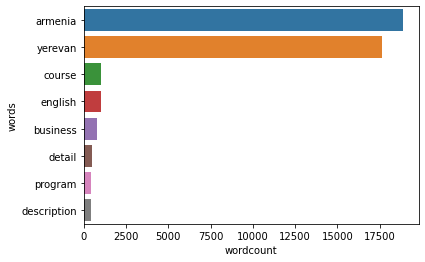

In [36]:
print("----------------\nColumn-Values k:\n----------------")
for i in range(len(text_feat)):print("{} -> {}".format(i,text_feat[i]), end =", ")
print("\n","--"*25)
k=int(input("Enter k: "))
n=int(input("How many words you want to show? "))

print("--"*25)
print(f">>Top {n} words for column-{text_feat[k]}")
print("--"*25)
plot_top_keywords(text_feat[k],n)

# Creating WORDCLOUD for diffrent columns


### UDF for creating wordcloud

In [37]:
from wordcloud import WordCloud
##UDF for wordcloud
def create_cloud(k):
    source=' '.join(df[text_feat[k]].astype('str'))
    wordcloud = WordCloud(max_words=50,stopwords=[],max_font_size=60,background_color='white').generate(source)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

### making wordcloud using user input

----------------
Column-Values k:
----------------
0 -> jobpost, 1 -> Title, 2 -> Company, 3 -> Location, 4 -> JobDescription, 5 -> JobRequirment, 6 -> RequiredQual, 
Enter k: 3
----------------------------------
Wordcloud for column-Location
---------------------------------



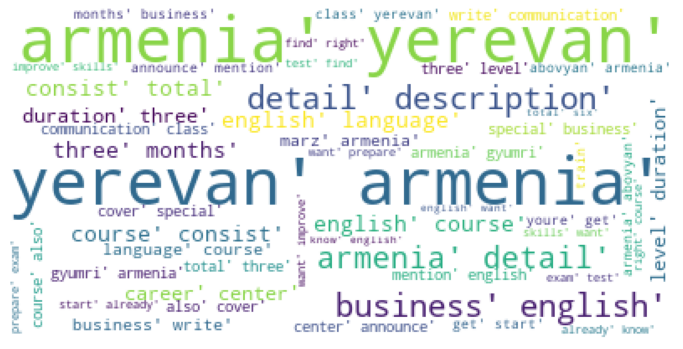

In [40]:
#making wordcloud using user input
print("----------------\nColumn-Values k:\n----------------")
for i in range(len(text_feat)):print("{} -> {}".format(i,text_feat[i]),end=", ")

k=int(input("\nEnter k: "))
print(f"----------------------------------\nWordcloud for column-{text_feat[k]}\n---------------------------------\n")
create_cloud(k)

# TEXT MINING

### Classifying IT and non-IT jobs

In [41]:
df['IT'] = df['IT'].astype('int64')
df_classify=df['IT'].reset_index().groupby('IT').count().reset_index()
df_classify

,IT,index
0,0,15209
1,1,3753


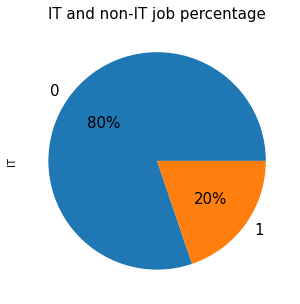

In [42]:
# Pie Chart Comparision 
plt.figure(figsize=(5,5))
df['IT'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=15, subplots='true')
plt.title('IT and non-IT job percentage',fontsize=15);

# CREATING TF-IDF MODEL

In [43]:
# Creating the Tf-Idf model
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
df.head(3)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,IT,Year,Month
0,"[ameria, investment, consult, company, job, ti...","[chief, financial, officer]","[ameria, investment, consult, company]","[yerevan, armenia]","[ameria, investment, consult, company, seek, c...","[supervise, financial, management, administrat...","[perform, job, successfully, individual, must,...",0,2004,1
1,"[international, research, exchange, board, ire...","[fulltime, community, connections, intern, pay...","[international, research, exchange, board, irex]","[irex, armenia, main, office, yerevan, armenia...","[incumbent, work, direct, supervision, company...","[participate, application, design, provide, ne...","[bachelor, degree, master, prefer, excellent, ...",0,2004,1
2,"[caucasus, environmental, ngo, network, cenn, ...","[country, coordinator]","[caucasus, environmental, ngo, network, cenn]","[yerevan, armenia]","[public, outreach, strengthen, grow, network, ...","[work, country, director, provide, environment...","[degree, environmentally, relate, field, five,...",0,2004,1


In [45]:
df['jobpost_corpus'] = [" ".join(review) for review in df['jobpost'].values]
df['jobpost_corpus'].head()

0    ameria investment consult company job title ch...
1    international research exchange board irex tit...
2    caucasus environmental ngo network cenn job ti...
3    manoff group job title bcc specialist position...
4    yerevan brandy company job title software deve...
Name: jobpost_corpus, dtype: object

In [46]:
vectorizer = TfidfVectorizer(max_features = 2200, min_df = 0.05, max_df = 0.95)
X = vectorizer.fit_transform(df['jobpost_corpus']).toarray()
X

array([[0.        , 0.        , 0.04178849, ..., 0.        , 0.01466238,
        0.00975216],
       [0.        , 0.        , 0.03737878, ..., 0.        , 0.        ,
        0.15701527],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04587574,
        0.03051261],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0434931 , 0.05023487,
        0.03341193],
       [0.        , 0.        , 0.        , ..., 0.08466359, 0.        ,
        0.0650396 ],
       [0.        , 0.        , 0.14403991, ..., 0.0525082 , 0.        ,
        0.04033744]])

In [47]:
X.shape

(18962, 566)

# SVM(Support Vector Machine): supervised machine learning

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, df.IT, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14221, 566), (4741, 566), (14221,), (4741,))

In [50]:
svclassifier = SVC(gamma = 'scale')
svclassifier.fit(X_train, y_train)

pred_y = svclassifier.predict(X_test)

In [51]:
print(pred_y.shape)
pred_y

(4741,)


array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [52]:
print(confusion_matrix(y_test,pred_y))  ##Confusion matrix
print(classification_report(y_test,pred_y)) ##Classification matrix

[[3737   73]
 [ 179  752]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3810
           1       0.91      0.81      0.86       931

    accuracy                           0.95      4741
   macro avg       0.93      0.89      0.91      4741
weighted avg       0.95      0.95      0.95      4741



In [53]:
cm = confusion_matrix(y_test, pred_y)##Confusion matrix
print("Accuracy of the model: ",cm.diagonal().sum()/cm.sum())

Accuracy of the model:  0.9468466568234549


# Kmeans Clustering: Unsupervised Machine Learning

In [54]:
from sklearn.cluster import KMeans 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score,pairwise_distances
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn import metrics

# Now, We are applying Kmeans clustering method on Required qualification column to analyze it

In [55]:
# Data Selection
df_km = df[['RequiredQual']]
df_km ['RequiredQual'] = df_km['RequiredQual'].astype(str)
df_km .head()

,RequiredQual
0,"['perform', 'job', 'successfully', 'individual..."
1,"['bachelor', 'degree', 'master', 'prefer', 'ex..."
2,"['degree', 'environmentally', 'relate', 'field..."
3,"['advance', 'degree', 'public', 'health', 'soc..."
4,"['university', 'degree', 'economical', 'backgr..."


# using Tfidf vectorizer

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.1, 
                             max_df=0.9,
                             ngram_range=(1, 4), 
                             stop_words='english')

vectorizer.fit(df_km['RequiredQual'])

X_train = vectorizer.transform(df_km['RequiredQual']) # Creates a training data

In [57]:
vocab = vectorizer.get_feature_names()
vocab

['ability',
 'ability work',
 'ability work pressure',
 'account',
 'advance',
 'analytical',
 'armenian',
 'armenian english',
 'armenian russian',
 'armenian russian english',
 'armenian russian english languages',
 'armenian russian languages',
 'bank',
 'basic',
 'business',
 'communication',
 'communication skills',
 'computer',
 'computer skills',
 'degree',
 'design',
 'development',
 'economics',
 'education',
 'english',
 'english language',
 'english languages',
 'english russian',
 'environment',
 'excel',
 'excellent',
 'excellent communication',
 'excellent communication skills',
 'excellent knowledge',
 'experience',
 'field',
 'finance',
 'fluency',
 'good',
 'good knowledge',
 'high',
 'higher',
 'higher education',
 'include',
 'international',
 'internet',
 'interpersonal',
 'knowledge',
 'knowledge armenian',
 'knowledge english',
 'knowledge english language',
 'knowledge russian',
 'language',
 'languages',
 'languages knowledge',
 'learn',
 'management',
 'market'

# Using TruncatedSVD to reduce dimensions

In [58]:
TR_svd = TruncatedSVD(100)
normal= Normalizer(copy=False)

In [59]:
svd_pipeline = make_pipeline(TR_svd, normal)
X_pip = svd_pipeline.fit_transform(X_train)

In [60]:
explained_variance = TR_svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(round(explained_variance * 100,4)))

Explained variance of the SVD step: 99.9872%


In [62]:
score_dict=dict()

for n in range(2,21):
    clusterer = KMeans(n_clusters=n)
    preds = clusterer.fit_predict(X_pip)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_pip, preds, metric='euclidean')
    score_dict[n]=score
    print("For n_clusters = {}, silhouette score is {}".format(n, score))

score_dict

For n_clusters = 2, silhouette score is 0.045987350973354824
For n_clusters = 3, silhouette score is 0.03995980654831314
For n_clusters = 4, silhouette score is 0.05130350752468813
For n_clusters = 5, silhouette score is 0.05653165592535237
For n_clusters = 6, silhouette score is 0.06254365647559314
For n_clusters = 7, silhouette score is 0.06431805929483682
For n_clusters = 8, silhouette score is 0.06508443745354328
For n_clusters = 9, silhouette score is 0.0663243341929766
For n_clusters = 10, silhouette score is 0.06861163803424425
For n_clusters = 11, silhouette score is 0.06886657764752381
For n_clusters = 12, silhouette score is 0.07222628486325446
For n_clusters = 13, silhouette score is 0.0720754612191874
For n_clusters = 14, silhouette score is 0.07507232106436798
For n_clusters = 15, silhouette score is 0.07468211411049304
For n_clusters = 16, silhouette score is 0.0757868817686198
For n_clusters = 17, silhouette score is 0.07594204898889806
For n_clusters = 18, silhouette sc

{2: 0.045987350973354824,
 3: 0.03995980654831314,
 4: 0.05130350752468813,
 5: 0.05653165592535237,
 6: 0.06254365647559314,
 7: 0.06431805929483682,
 8: 0.06508443745354328,
 9: 0.0663243341929766,
 10: 0.06861163803424425,
 11: 0.06886657764752381,
 12: 0.07222628486325446,
 13: 0.0720754612191874,
 14: 0.07507232106436798,
 15: 0.07468211411049304,
 16: 0.0757868817686198,
 17: 0.07594204898889806,
 18: 0.07644047363550847,
 19: 0.07704197929064197,
 20: 0.07818901375595877}

In [63]:
score_df=pd.DataFrame(score_dict.items(),columns=['no_of_clusters','silhouette score'])
score_df.head()

,no_of_clusters,silhouette score
0,2,0.045987
1,3,0.039960
2,4,0.051304
3,5,0.056532
4,6,0.062544


Text(0, 0.5, 'silhouette-score')

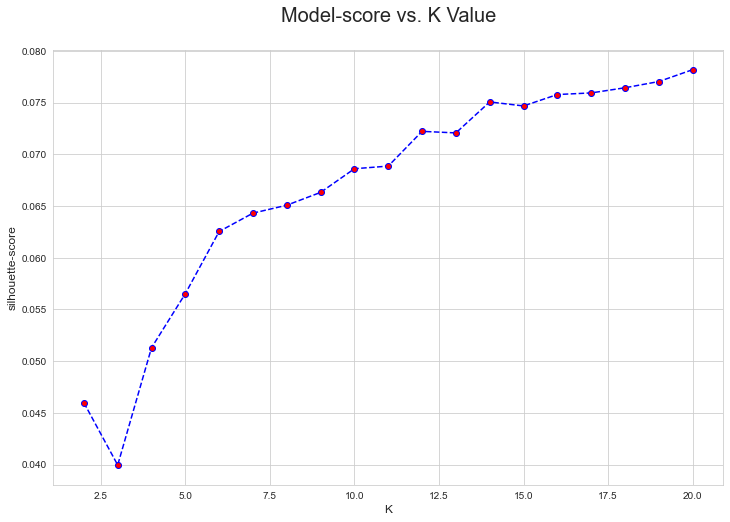

In [64]:
#visualization
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(score_df['no_of_clusters'],
         score_df['silhouette score'],
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=6
        )

plt.title('Model-score vs. K Value\n',fontsize=20)
plt.xlabel('K',fontsize=12)
plt.ylabel('silhouette-score',fontsize=12)

In [65]:
# we create a kmeans model
km_model = KMeans(n_clusters=11, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=42)

# apply the model on this prepared data
fitted_km_model = km_model.fit(X_train)
fitted_km_model

KMeans(max_iter=100, n_clusters=11, n_init=1, random_state=42)

# Getting the vocabulary from the tf-idf

In [66]:
vocab = vectorizer.get_feature_names()
vocab = np.array(vocab)
vocab

array(['ability', 'ability work', 'ability work pressure', 'account',
       'advance', 'analytical', 'armenian', 'armenian english',
       'armenian russian', 'armenian russian english',
       'armenian russian english languages', 'armenian russian languages',
       'bank', 'basic', 'business', 'communication',
       'communication skills', 'computer', 'computer skills', 'degree',
       'design', 'development', 'economics', 'education', 'english',
       'english language', 'english languages', 'english russian',
       'environment', 'excel', 'excellent', 'excellent communication',
       'excellent communication skills', 'excellent knowledge',
       'experience', 'field', 'finance', 'fluency', 'good',
       'good knowledge', 'high', 'higher', 'higher education', 'include',
       'international', 'internet', 'interpersonal', 'knowledge',
       'knowledge armenian', 'knowledge english',
       'knowledge english language', 'knowledge russian', 'language',
       'languages', 

# Getting the cluster centers from the fitted Kmeans model

In [67]:
cluster_centers = np.array(fitted_km_model.cluster_centers_)
print(cluster_centers.shape)
cluster_centers

(11, 102)


array([[0.10650572, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25828326, 0.16864014, 0.08917443, ..., 0.02487536, 0.02871282,
        0.02856599],
       [0.04753053, 0.01858037, 0.00128724, ..., 0.06510457, 0.07143459,
        0.07069647],
       ...,
       [0.07420903, 0.03909502, 0.01346133, ..., 0.02481465, 0.03486385,
        0.03467897],
       [0.12653929, 0.03246223, 0.00491491, ..., 0.04930395, 0.01534288,
        0.01533952],
       [0.11514735, 0.04165856, 0.00794434, ..., 0.06356529, 0.03852176,
        0.03810585]])

In [68]:
##Check 
x=np.array((0.1,10,0.05,1.5,2,5))
print(x)
print(x.argsort()) # x.argshot() returns an array of indices that would sort the array.

[ 0.1  10.    0.05  1.5   2.    5.  ]
[2 0 3 4 5 1]


# Creating word-list with Top 15 words from each cluster

In [69]:
#sorting the cluster centers
centre_arr=fitted_km_model.cluster_centers_

sorted_vals = [centre_arr[i].argsort() for i in range(0,centre_arr.shape[0])]
sorted_vals

[array([ 50,  41,  42,  43,  44,  46,  48, 100,  56,  57,  58,  59,  60,
         62,  65,  36,  66,  69,  70,  73,  74,  75,  82,  84,  88,  89,
         92,  94,  95,  98,  99,  68,  33, 101,  11,   1,  18,   2,  21,
          3,   4,  29,  28,  22,  12,  23,  14,  25,  35,  71,  72,  49,
         19,  87,  20,  90,  91,   8,  77,  78,   9,  10,  37,  79,  27,
         81,   5,  85,  34,  93,  39,  67,  40,  97,  63,  47,  24,   0,
         53,   6,  76,  30,  38,  17,  52,  96,  64,  26,  31,  61,   7,
         45,  54,  51,  13,  83,  55,  86,  32,  15,  80,  16], dtype=int64),
 array([ 10,   9,  78,  77,   3,  54,  83,  12,  13,  36,  20,  32,  74,
         50,  26,  11,   8,  48,  84,  22,  69,  51,  21,  99,  97,  43,
         42,  61,  65,  55,  70,  45,  57,  72,  66, 101,  59, 100,  31,
         44,  88,  39,  14,   7,  29,  27,  41,  89,  18,  92,   4,  49,
         86,  79,  37,  68,  25,   5,  23,  73,  56,  33,  60,  71,  91,
         90,  58,  63,  76,  28,  64,  75,  46

In [70]:
sorted_vals[1]  #sorted indices in cluster-1, arranged in increasing order

array([ 10,   9,  78,  77,   3,  54,  83,  12,  13,  36,  20,  32,  74,
        50,  26,  11,   8,  48,  84,  22,  69,  51,  21,  99,  97,  43,
        42,  61,  65,  55,  70,  45,  57,  72,  66, 101,  59, 100,  31,
        44,  88,  39,  14,   7,  29,  27,  41,  89,  18,  92,   4,  49,
        86,  79,  37,  68,  25,   5,  23,  73,  56,  33,  60,  71,  91,
        90,  58,  63,  76,  28,  64,  75,  46,  62,  35,  52,  17,  53,
        98,  16,   6,  40,  24,  19,  94,  96,  82,  85,  15,  38,   2,
        87,  95,  81,  30,  67,  34,  47,  80,   1,  93,   0], dtype=int64)

In [71]:
sorted_vals[1][-15:] #top 15 word-indices

array([85, 15, 38,  2, 87, 95, 81, 30, 67, 34, 47, 80,  1, 93,  0],
      dtype=int64)

In [72]:
set(vocab[sorted_vals[1][-15:]])

{'ability',
 'ability work',
 'ability work pressure',
 'communication',
 'excellent',
 'experience',
 'good',
 'knowledge',
 'pressure',
 'skills',
 'skills ability',
 'strong',
 'team',
 'work',
 'work pressure'}

In [73]:
words=set()
for i in range(len(fitted_km_model.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-15:]])) #union method adds new words to the set
word_list=list(words)

print(len(word_list))
print(word_list)

74
['experience', 'armenian russian', 'design', 'armenian', 'armenian russian english languages', 'computer', 'years', 'bank', 'excellent communication skills', 'good', 'field', 'university', 'knowledge russian', 'armenian russian english', 'knowledge english language', 'market', 'software', 'excellent', 'work experience', 'understand', 'finance', 'languages', 'knowledge armenian', 'english', 'account', 'communication', 'business', 'knowledge english', 'task', 'education', 'russian english languages', 'plus', 'english languages', 'oral', 'ability work', 'knowledge', 'higher education', 'project', 'work', 'russian english', 'skills ability', 'program', 'ability work pressure', 'basic', 'university degree', 'russian languages', 'languages knowledge', 'degree', 'excellent communication', 'english language', 'armenian russian languages', 'ability', 'years work', 'relevant', 'communication skills', 'pressure', 'economics', 'management', 'team', 'higher', 'skills good', 'russian', 'skills', 

# Adding top words to train set

In [74]:
len([np.argwhere(vocab==x)[0][0] for x in words])

74

In [75]:
X_train[:,[np.argwhere(vocab==i)[0][0] for i in word_list]]#word_list

<18962x74 sparse matrix of type '<class 'numpy.float64'>'
	with 392323 stored elements in Compressed Sparse Row format>

In [76]:
train_set=X_train[:,[np.argwhere(vocab==i)[0][0] for i in words]]
type(train_set)

scipy.sparse.csr.csr_matrix

In [77]:
df_km['cluster_serial'] = km_model.labels_
df_km.head(10)

,RequiredQual,cluster_serial
0,"['perform', 'job', 'successfully', 'individual...",5
1,"['bachelor', 'degree', 'master', 'prefer', 'ex...",1
2,"['degree', 'environmentally', 'relate', 'field...",2
3,"['advance', 'degree', 'public', 'health', 'soc...",10
4,"['university', 'degree', 'economical', 'backgr...",6
5,"['candidates', 'female', '2030', 'years', 'old...",3
6,"['university', 'degree', 'finance', 'account',...",5
7,"['excellent', 'communication', 'skills', 'good...",0
8,"['university', 'degree', 'least', 'three', 'ye...",4
9,"['note', 'applicants', 'instruct', 'address', ...",9


In [78]:
df_km.groupby('cluster_serial').count().T

cluster_serial,0,1,2,3,4,5,6,7,8,9,10
RequiredQual,575,2587,1624,1987,1844,1118,2178,975,1892,2224,1958


# Kmeans model with k=6

In [79]:
# we create a kmeans model
km_model = KMeans(n_clusters=6, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=42)

# apply the model on this prepared data
fitted_km_model = km_model.fit(X_train)
fitted_km_model

KMeans(max_iter=100, n_clusters=6, n_init=1, random_state=42)

In [80]:
### Getting the vocabulary from the tf-idf 
vocab = vectorizer.get_feature_names()
vocab = np.array(vocab)
vocab

array(['ability', 'ability work', 'ability work pressure', 'account',
       'advance', 'analytical', 'armenian', 'armenian english',
       'armenian russian', 'armenian russian english',
       'armenian russian english languages', 'armenian russian languages',
       'bank', 'basic', 'business', 'communication',
       'communication skills', 'computer', 'computer skills', 'degree',
       'design', 'development', 'economics', 'education', 'english',
       'english language', 'english languages', 'english russian',
       'environment', 'excel', 'excellent', 'excellent communication',
       'excellent communication skills', 'excellent knowledge',
       'experience', 'field', 'finance', 'fluency', 'good',
       'good knowledge', 'high', 'higher', 'higher education', 'include',
       'international', 'internet', 'interpersonal', 'knowledge',
       'knowledge armenian', 'knowledge english',
       'knowledge english language', 'knowledge russian', 'language',
       'languages', 

In [81]:
### Getting the cluster centers from the fitted Kmeans model

cluster_centers = np.array(fitted_km_model.cluster_centers_)
print(cluster_centers.shape)
cluster_centers

(6, 102)


array([[1.06505720e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.75999765e-03, 1.20485355e-01, 2.14040724e-01,
        6.18147955e-04, 7.96814348e-04, 8.12014930e-04, 0.00000000e+00,
        0.00000000e+00, 2.26871148e-01, 0.00000000e+00, 2.40550107e-01,
        2.93161913e-01, 1.30669366e-01, 0.00000000e+00, 4.18280556e-04,
        5.22998693e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.86437676e-02, 0.00000000e+00, 1.77930612e-01, 1.24234355e-03,
        0.00000000e+00, 0.00000000e+00, 1.20677975e-01, 2.03489666e-01,
        2.32087006e-01, 0.00000000e+00, 1.83632835e-03, 2.47611697e-04,
        0.00000000e+00, 1.00961895e-03, 1.25671210e-01, 3.12434597e-03,
        4.28248926e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.15630261e-01, 0.00000000e+00, 8.74515679e-02,
        0.00000000e+00, 3.62710335e-04, 0.00000000e+00, 2.25006948e-01,
        1.35013088e-01, 1.17297887e-01, 2.22905066e-01, 2.300324

In [82]:
#sorting the cluster centers
centre_arr=fitted_km_model.cluster_centers_
sorted_vals = [centre_arr[i].argsort() for i in range(0,centre_arr.shape[0])]
#sorted_vals

#Creating word-list with Top 15 words from each cluster
words=set()
for i in range(len(fitted_km_model.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-15:]])) #union method adds new words to the set
word_list=list(words)

print(len(word_list))
print(word_list)

55
['communication', 'knowledge english', 'experience', 'task', 'armenian russian', 'armenian', 'design', 'education', 'armenian russian english languages', 'computer', 'plus', 'russian english languages', 'years experience', 'english languages', 'oral', 'knowledge', 'ability work', 'higher education', 'years', 'work', 'russian english', 'excellent communication skills', 'program', 'good', 'basic', 'university degree', 'russian languages', 'university', 'languages knowledge', 'degree', 'knowledge russian', 'armenian russian english', 'excellent communication', 'knowledge english language', 'software', 'english language', 'excellent', 'ability', 'work experience', 'communication skills', 'understand', 'management', 'higher', 'skills good', 'russian', 'skills', 'internet', 'languages', 'strong', 'learn', 'english', 'armenian english', 'good knowledge', 'development', 'language']


In [83]:
## Adding top words to train set

len([np.argwhere(vocab==x)[0][0] for x in words])

X_train[:,[np.argwhere(vocab==i)[0][0] for i in word_list]]#word_list

train_set=X_train[:,[np.argwhere(vocab==i)[0][0] for i in words]]
type(train_set)

scipy.sparse.csr.csr_matrix

In [84]:
df_km['cluster_serial'] = km_model.labels_
df_km.head(10)

,RequiredQual,cluster_serial
0,"['perform', 'job', 'successfully', 'individual...",5
1,"['bachelor', 'degree', 'master', 'prefer', 'ex...",5
2,"['degree', 'environmentally', 'relate', 'field...",2
3,"['advance', 'degree', 'public', 'health', 'soc...",3
4,"['university', 'degree', 'economical', 'backgr...",1
5,"['candidates', 'female', '2030', 'years', 'old...",5
6,"['university', 'degree', 'finance', 'account',...",5
7,"['excellent', 'communication', 'skills', 'good...",0
8,"['university', 'degree', 'least', 'three', 'ye...",2
9,"['note', 'applicants', 'instruct', 'address', ...",5


In [85]:
df_km.groupby('cluster_serial').count().T

cluster_serial,0,1,2,3,4,5
RequiredQual,575,3127,2430,3328,3004,6498
